# Tensor类型

- 模块`torch.Tensor`

In [1]:
import torch

torch.Tensor

torch.Tensor

In [1]:
# help(torch.Tensor)

- Tensor张量就是一个统一类型的矩阵。可以按照数据类型与设备分成多种。
    - 默认的torch.Tensor实际是torch.FloatTensor的别名；

类型|类型定义|CPU|GPU
-|-|-|-
16位浮点数|torch.half / torch.float16|torch.HalfTensor|torch.cuda.HalfTensor
32浮点数|torch.float / torch.float32|torch.FloatTensor|torch.cuda.FloatTensor
64位浮点数|torch.double / torch.float64|torch.DoubleTensor|torch.cuda.DoubleTensor
8位整数|torch.int8|torch.CharTensor|torch.cuda.CharTensor
16位整数|torch.int16 / torch.short|torch.ShortTensor|torch.cuda.ShortTensor
32位整数|torch.int32 / torch.int|torch.IntTensor|torch.cuda.IntTensor
64位整数|torch.int64 / torch.long|torch.LongTensor|torch.cuda.LongTensor
8位无符号整数|torch.uint8|torch.ByteTensor|torch.cuda.ByteTensor
8位逻辑类型|torch.bool|torch.BoolTensor|torch.cuda.BoolTensor



# Tensor的构建

- Tensor的构建两种方式
    1. 构造器方式
        - torch.Tensor类
    2. 函数工具方式
        - torch.tensor函数

## Tensor构造器

In [8]:
help(torch.Tensor.__init__)

Help on wrapper_descriptor:

__init__(self, /, *args, **kwargs)
    Initialize self.  See help(type(self)) for accurate signature.



- 实际上这儿存在一个文档描述没有说清楚的问题，上面构造器来自`_TensorBase.py`中的`_TensorBase`类，就是Tensor的父类，`_TensorBase`类来自C++。下面用几点来说明这个调用过程：
    - 上面的`_TensorBase.py`文件可以通过文件搜索找到；或者使用PyCharm跟踪找到。
    - Torch早期版本来自Lua语言实现，该语言是与C语言交互非常直接的。
    - 后来Torch从C扩展到C++
    - 在Python中开始使用Cython开始扩展，其中很多效率性的处理都是交给C/C++语言的，这样Python文档很多不清楚的地方实际都在C++中找到原型说明，比如Tensor的构造器；

- 在官网可以直接下载C++库；C++只能下载库，源代码只有Python的扩展源代码，没有C++的源代码：
    - 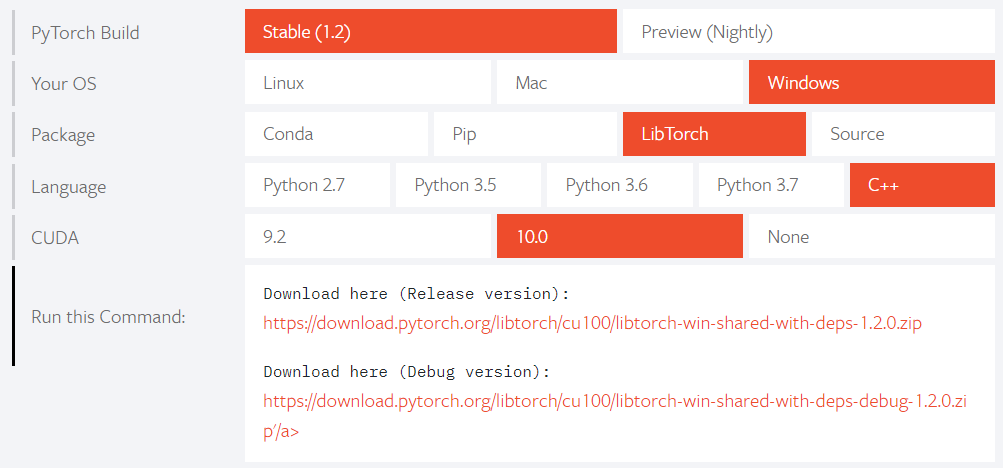

## C的Tensor构造函数

- 下面文件可以下载C库，并在include目录下找到`TH\generic\THTensor.h`

```C
#ifndef TH_GENERIC_FILE
#define TH_GENERIC_FILE "TH/generic/THTensor.h"
#else

/* a la lua? dim, storageoffset, ...  et les methodes ? */

#include <c10/core/TensorImpl.h>

#define THTensor at::TensorImpl

// These used to be distinct types; for some measure of backwards compatibility and documentation
// alias these to the single THTensor type.
#define THFloatTensor THTensor
#define THDoubleTensor THTensor
#define THHalfTensor THTensor
#define THByteTensor THTensor
#define THCharTensor THTensor
#define THShortTensor THTensor
#define THIntTensor THTensor
#define THLongTensor THTensor
#define THBoolTensor THTensor
#define THBFloat16Tensor THTensor

/**** access methods ****/
TH_API THStorage* THTensor_(storage)(const THTensor *self);
TH_API ptrdiff_t THTensor_(storageOffset)(const THTensor *self);

// See [NOTE: nDimension vs nDimensionLegacyNoScalars vs nDimensionLegacyAll]
TH_API int THTensor_(nDimension)(const THTensor *self);
TH_API int THTensor_(nDimensionLegacyNoScalars)(const THTensor *self);
TH_API int THTensor_(nDimensionLegacyAll)(const THTensor *self);
TH_API int64_t THTensor_(size)(const THTensor *self, int dim);
TH_API int64_t THTensor_(stride)(const THTensor *self, int dim);
TH_API scalar_t *THTensor_(data)(const THTensor *self);


/**** creation methods ****/
TH_API THTensor *THTensor_(new)(void);
TH_API THTensor *THTensor_(newWithTensor)(THTensor *tensor);
TH_API THTensor *THTensor_(newWithStorage1d)(THStorage *storage_, ptrdiff_t storageOffset_,
                                int64_t size0_, int64_t stride0_);
TH_API THTensor *THTensor_(newWithStorage2d)(THStorage *storage_, ptrdiff_t storageOffset_,
                                int64_t size0_, int64_t stride0_,
                                int64_t size1_, int64_t stride1_);
TH_API THTensor *THTensor_(newWithStorage3d)(THStorage *storage_, ptrdiff_t storageOffset_,
                                int64_t size0_, int64_t stride0_,
                                int64_t size1_, int64_t stride1_,
                                int64_t size2_, int64_t stride2_);
TH_API THTensor *THTensor_(newWithStorage4d)(THStorage *storage_, ptrdiff_t storageOffset_,
                                int64_t size0_, int64_t stride0_,
                                int64_t size1_, int64_t stride1_,
                                int64_t size2_, int64_t stride2_,
                                int64_t size3_, int64_t stride3_);

/* stride might be NULL */
TH_API THTensor *THTensor_(newWithSize1d)(int64_t size0_);
TH_API THTensor *THTensor_(newWithSize2d)(int64_t size0_, int64_t size1_);
TH_API THTensor *THTensor_(newWithSize3d)(int64_t size0_, int64_t size1_, int64_t size2_);
TH_API THTensor *THTensor_(newWithSize4d)(int64_t size0_, int64_t size1_, int64_t size2_, int64_t size3_);

TH_API THTensor *THTensor_(newClone)(THTensor *self);
TH_API THTensor *THTensor_(newContiguous)(THTensor *tensor);
TH_API THTensor *THTensor_(newSelect)(THTensor *tensor, int dimension_, int64_t sliceIndex_);
TH_API THTensor *THTensor_(newNarrow)(THTensor *tensor, int dimension_, int64_t firstIndex_, int64_t size_);
TH_API THTensor *THTensor_(newTranspose)(THTensor *tensor, int dimension1_, int dimension2_);

// resize* methods simply resize the storage. So they may not retain the current data at current indices.
// This is especially likely to happen when the tensor is not contiguous. In general, if you still need the
// values, unless you are doing some size and stride tricks, do not use resize*.
TH_API void THTensor_(resizeNd)(THTensor *tensor, int nDimension, const int64_t *size, const int64_t *stride);
TH_API void THTensor_(resizeAs)(THTensor *tensor, THTensor *src);
TH_API void THTensor_(resize0d)(THTensor *tensor);
TH_API void THTensor_(resize1d)(THTensor *tensor, int64_t size0_);
TH_API void THTensor_(resize2d)(THTensor *tensor, int64_t size0_, int64_t size1_);
TH_API void THTensor_(resize3d)(THTensor *tensor, int64_t size0_, int64_t size1_, int64_t size2_);
TH_API void THTensor_(resize4d)(THTensor *tensor, int64_t size0_, int64_t size1_, int64_t size2_, int64_t size3_);
TH_API void THTensor_(resize5d)(THTensor *tensor, int64_t size0_, int64_t size1_, int64_t size2_, int64_t size3_, int64_t size4_);
// Note: these are legacy resize functions that treat sizes as size->size() == 0 and size->data<int64_t>() as being 0-terminated.

TH_API void THTensor_(set)(THTensor *self, THTensor *src);
TH_API void THTensor_(setStorageNd)(THTensor *self, THStorage *storage_, ptrdiff_t storageOffset_, int nDimension, const int64_t *size, const int64_t *stride);
TH_API void THTensor_(setStorage1d)(THTensor *self, THStorage *storage_, ptrdiff_t storageOffset_,
                                    int64_t size0_, int64_t stride0_);
TH_API void THTensor_(setStorage2d)(THTensor *self, THStorage *storage_, ptrdiff_t storageOffset_,
                                    int64_t size0_, int64_t stride0_,
                                    int64_t size1_, int64_t stride1_);
TH_API void THTensor_(setStorage3d)(THTensor *self, THStorage *storage_, ptrdiff_t storageOffset_,
                                    int64_t size0_, int64_t stride0_,
                                    int64_t size1_, int64_t stride1_,
                                    int64_t size2_, int64_t stride2_);
TH_API void THTensor_(setStorage4d)(THTensor *self, THStorage *storage_, ptrdiff_t storageOffset_,
                                    int64_t size0_, int64_t stride0_,
                                    int64_t size1_, int64_t stride1_,
                                    int64_t size2_, int64_t stride2_,
                                    int64_t size3_, int64_t stride3_);

TH_API void THTensor_(narrow)(THTensor *self, THTensor *src, int dimension_, int64_t firstIndex_, int64_t size_);
TH_API void THTensor_(select)(THTensor *self, THTensor *src, int dimension_, int64_t sliceIndex_);
TH_API void THTensor_(transpose)(THTensor *self, THTensor *src, int dimension1_, int dimension2_);
TH_API int THTensor_(isTransposed)(const THTensor *self);
TH_API void THTensor_(unfold)(THTensor *self, THTensor *src, int dimension_, int64_t size_, int64_t step_);

TH_API void THTensor_(squeeze)(THTensor *self, THTensor *src);
TH_API void THTensor_(squeeze1d)(THTensor *self, THTensor *src, int dimension_);
TH_API void THTensor_(unsqueeze1d)(THTensor *self, THTensor *src, int dimension_);

TH_API int THTensor_(isContiguous)(const THTensor *self);
TH_API int THTensor_(isSameSizeAs)(const THTensor *self, const THTensor *src);
TH_API int THTensor_(isSetTo)(const THTensor *self, const THTensor *src);
TH_API ptrdiff_t THTensor_(nElement)(const THTensor *self);

TH_API void THTensor_(retain)(THTensor *self);
TH_API void THTensor_(free)(THTensor *self);
TH_API void THTensor_(freeCopyTo)(THTensor *self, THTensor *dst);

/* Slow access methods [check everything] */
TH_API void THTensor_(set0d)(THTensor *tensor, scalar_t value);
TH_API void THTensor_(set1d)(THTensor *tensor, int64_t x0, scalar_t value);
TH_API void THTensor_(set2d)(THTensor *tensor, int64_t x0, int64_t x1, scalar_t value);
TH_API void THTensor_(set3d)(THTensor *tensor, int64_t x0, int64_t x1, int64_t x2, scalar_t value);
TH_API void THTensor_(set4d)(THTensor *tensor, int64_t x0, int64_t x1, int64_t x2, int64_t x3, scalar_t value);

TH_API scalar_t THTensor_(get0d)(const THTensor *tensor);
TH_API scalar_t THTensor_(get1d)(const THTensor *tensor, int64_t x0);
TH_API scalar_t THTensor_(get2d)(const THTensor *tensor, int64_t x0, int64_t x1);
TH_API scalar_t THTensor_(get3d)(const THTensor *tensor, int64_t x0, int64_t x1, int64_t x2);
TH_API scalar_t THTensor_(get4d)(const THTensor *tensor, int64_t x0, int64_t x1, int64_t x2, int64_t x3);

/* Shape manipulation methods */
TH_API void THTensor_(cat)(THTensor *r_, THTensor *ta, THTensor *tb, int dimension);
TH_API void THTensor_(catArray)(THTensor *result, THTensor **inputs, int numInputs, int dimension);

/* Debug methods */
TH_API THDescBuff THTensor_(desc)(const THTensor *tensor);
TH_API THDescBuff THTensor_(sizeDesc)(const THTensor *tensor);

#endif

```

## C++的构造

- 来自C++库（与C同一个库）的`TH\generic\THTensor.hpp`文件：

```C++
#ifndef TH_GENERIC_FILE
#define TH_GENERIC_FILE "TH/generic/THTensor.hpp"
#else

// STOP!!! Thinking of including this header directly?  Please
// read Note [TH abstraction violation]

// NOTE: functions exist here only to support dispatch via Declarations.cwrap.  You probably don't want to put
// new functions in here, they should probably be un-genericized.

TH_CPP_API void THTensor_(setStorage)(THTensor *self, THStorage *storage_, ptrdiff_t storageOffset_,
                                      at::IntArrayRef size_, at::IntArrayRef stride_);
/* strides.data() might be NULL */
TH_CPP_API THTensor *THTensor_(newWithStorage)(THStorage *storage, ptrdiff_t storageOffset,
                                               at::IntArrayRef sizes, at::IntArrayRef strides);

TH_CPP_API void THTensor_(resize)(THTensor *self, at::IntArrayRef size, at::IntArrayRef stride);
TH_CPP_API THTensor *THTensor_(newWithSize)(at::IntArrayRef size, at::IntArrayRef stride);

#endif

```

## TensorStorage类

```C++
#ifndef TH_GENERIC_FILE
#define TH_GENERIC_FILE "TH/generic/THStorage.h"
#else

#include <c10/core/Allocator.h>
#include <c10/core/StorageImpl.h>

/* on pourrait avoir un liste chainee
   qui initialise math, lab structures (or more).
   mouais -- complique.

   Pb: THMapStorage is kind of a class
   THLab_()... comment je m'en sors?

   en template, faudrait que je les instancie toutes!!! oh boy!
   Et comment je sais que c'est pour Cuda? Le type float est le meme dans les <>

   au bout du compte, ca serait sur des pointeurs float/double... etc... = facile.
   primitives??
 */

// Struct definition is moved to THStorage.hpp (so this file stays C compatible)

#define THStorage at::StorageImpl

// These used to be distinct types; for some measure of backwards compatibility and documentation
// alias these to the single THStorage type.
#define THFloatStorage THStorage
#define THDoubleStorage THStorage
#define THHalfStorage THStorage
#define THByteStorage THStorage
#define THCharStorage THStorage
#define THShortStorage THStorage
#define THIntStorage THStorage
#define THLongStorage THStorage
#define THBoolStorage THStorage
#define THBFloat16Storage THStorage

TH_API scalar_t* THStorage_(data)(const THStorage*);
TH_API ptrdiff_t THStorage_(size)(const THStorage*);
TH_API size_t THStorage_(elementSize)(void);

/* slow access -- checks everything */
TH_API void THStorage_(set)(THStorage*, ptrdiff_t, scalar_t);
TH_API scalar_t THStorage_(get)(const THStorage*, ptrdiff_t);

TH_API THStorage* THStorage_(new)(void);
TH_API THStorage* THStorage_(newWithSize)(ptrdiff_t size);
TH_API THStorage* THStorage_(newWithSize1)(scalar_t);
TH_API THStorage* THStorage_(newWithSize2)(scalar_t, scalar_t);
TH_API THStorage* THStorage_(newWithSize3)(scalar_t, scalar_t, scalar_t);
TH_API THStorage* THStorage_(newWithSize4)(scalar_t, scalar_t, scalar_t, scalar_t);
TH_API THStorage* THStorage_(newWithMapping)(const char *filename, ptrdiff_t size, int flags);

TH_API THStorage* THStorage_(newWithAllocator)(ptrdiff_t size,
                                               c10::Allocator* allocator);
TH_API THStorage* THStorage_(newWithDataAndAllocator)(
    at::DataPtr&& data, ptrdiff_t size, at::Allocator* allocator);

/* should not differ with API */
TH_API void THStorage_(setFlag)(THStorage *storage, const char flag);
TH_API void THStorage_(clearFlag)(THStorage *storage, const char flag);
TH_API void THStorage_(retain)(THStorage *storage);
TH_API void THStorage_(swap)(THStorage *storage1, THStorage *storage2);

/* might differ with other API (like CUDA) */
TH_API void THStorage_(free)(THStorage *storage);
TH_API void THStorage_(resize)(THStorage *storage, ptrdiff_t size);
TH_API void THStorage_(fill)(THStorage *storage, scalar_t value);

#endif

```

## Python中的函数

- C与C++的函数在Python中都提供了封装实现。在python的`site-package`目录下的__init__.pyi文件中都有接口说明。
    - 实际上Tensor的构造器与`tensor`， `*_like`，`new_*`等函数共享相同的参数格式。

## 官方推荐的Tensor创建方式
    - 使用torch.tensor函数
    - 使用torch.*_like函数
    - 使用torch.new_*函数
    - 其他的特殊功能的创建函数（随机Tensor，从其他格式转换创建，从文件加载创建等）

## Tensor的创建例子

### 使用tensor函数创建

- tensor函数总是使用深度拷贝，器特点是从已有的数据直接构建Tensor。 已有的数据格式包含
    - list
    - tuple,
    - NumPy ``ndarray``, 
    - scalar
    - other types.

```python
    torch.tensor(data, dtype=None, device=None, requires_grad=False, pin_memory=False) → Tensor
```

In [44]:
import torch
print(help(torch.tensor))

Help on built-in function tensor:

tensor(...)
    tensor(data, dtype=None, device=None, requires_grad=False, pin_memory=False) -> Tensor
    
    Constructs a tensor with :attr:`data`.
    
    .. warning::
    
        :func:`torch.tensor` always copies :attr:`data`. If you have a Tensor
        ``data`` and want to avoid a copy, use :func:`torch.Tensor.requires_grad_`
        or :func:`torch.Tensor.detach`.
        If you have a NumPy ``ndarray`` and want to avoid a copy, use
        :func:`torch.as_tensor`.
    
    .. warning::
    
        When data is a tensor `x`, :func:`torch.tensor` reads out 'the data' from whatever it is passed,
        and constructs a leaf variable. Therefore ``torch.tensor(x)`` is equivalent to ``x.clone().detach()``
        and ``torch.tensor(x, requires_grad=True)`` is equivalent to ``x.clone().detach().requires_grad_(True)``.
        The equivalents using ``clone()`` and ``detach()`` are recommended.
    
    Args:
        data (array_like): Initial d

1. list与tuple

In [45]:
import torch

t_list = torch.tensor([1, 2, 3])
t_tuple = torch.tensor(((4, 5, 6), (7, 8, 9)))
print(t_list, t_tuple)


tensor([1, 2, 3]) tensor([[4, 5, 6],
        [7, 8, 9]])


2. scalar标量

In [46]:
t_scalar = torch.tensor(88)
print(t_scalar)

tensor(88)


3. numpy.ndarray

In [47]:
import numpy as np
n_arr = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
t_ndarray = torch.tensor(n_arr)
print(t_ndarray)

tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])


4. 其他

    - 测试下DataFrame，但是数据还是需要转换成numpy。

In [48]:
import pandas as  pd
pd_data = pd.DataFrame([[1,2,3], [4,5,6]])
print(pd_data)
print(type(pd_data.values))
t_pandas = torch.tensor(pd_data.values)
print(t_pandas)

   0  1  2
0  1  2  3
1  4  5  6
<class 'numpy.ndarray'>
tensor([[1, 2, 3],
        [4, 5, 6]])


### 使用Tensor构造器

- 按照C的函数定义与C++的类取使用。

#### 空初始化

```C++
/* Empty init */
THTensor *THTensor_(new)(void)
{
  return c10::make_intrusive<at::TensorImpl, at::UndefinedTensorImpl>(
    c10::intrusive_ptr<at::StorageImpl>::reclaim(THStorage_(new)()),
    at::CPUTensorId()
  ).release();
}
```

In [33]:
import torch
t1 = torch.Tensor()
print(t1)

tensor([])


####   指针拷贝
    - 引用拷贝
    
```C++
/* Pointer-copy init */
THTensor *THTensor_(newWithTensor)(THTensor *tensor)
{
  return at::native::alias(THTensor_wrap(tensor)).unsafeReleaseTensorImpl();
}

```

In [34]:
arr = np.array([[1, 2, 3, 4], [5, 6, 7, 8]],  np.float32)  # 记得添加类型
t_arr = torch.tensor(arr)

t2 = torch.Tensor(t_arr)       # t_arr必须是float32， 这是Tensor的默认类型，
                                        # Tensor构造器是不能指定类型，tensor函数可以
print(t2)

tensor([[1., 2., 3., 4.],
        [5., 6., 7., 8.]])


In [35]:
# 如果输入的是整型，就必须使用整型的Tensor
arr_i = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])  # 字面值默认是Long类型
t_arr_i = torch.tensor(arr_i)

t2_i = torch.LongTensor(t_arr_i)       # t_arr必须是float32， 这是Tensor的默认类型，
                                        # Tensor构造器是不能指定类型，tensor函数可以
print(t2_i)

tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])


#### 使用Storage构造

    - 在官方的文档中，提供的是torch.Storage的类说明，实际上每个Tensor都提供一个对应类型的Storage，可以使用python的doc工具查看到如下输出：

```python
    torch.storage._StorageBase(builtins.object)
        |- BoolStorage(torch._C.BoolStorageBase, torch.storage._StorageBase)
        |- ByteStorage(torch._C.ByteStorageBase, torch.storage._StorageBase)
        |- CharStorage(torch._C.CharStorageBase, torch.storage._StorageBase)
        |- DoubleStorage(torch._C.DoubleStorageBase, torch.storage._StorageBase)
        |- FloatStorage(torch._C.FloatStorageBase, torch.storage._StorageBase)
        |- IntStorage(torch._C.IntStorageBase, torch.storage._StorageBase)
        |- LongStorage(torch._C.LongStorageBase, torch.storage._StorageBase)
        |- ShortStorage(torch._C.ShortStorageBase, torch.storage._StorageBase)
```

- Storage的构造函数在python中也查不到详细的说明，可以通过C/C++的文档查阅到

```C++
TH_API THStorage* THStorage_(new)(void);
TH_API THStorage* THStorage_(newWithSize)(ptrdiff_t size);
TH_API THStorage* THStorage_(newWithSize1)(scalar_t);
TH_API THStorage* THStorage_(newWithSize2)(scalar_t, scalar_t);
TH_API THStorage* THStorage_(newWithSize3)(scalar_t, scalar_t, scalar_t);
TH_API THStorage* THStorage_(newWithSize4)(scalar_t, scalar_t, scalar_t, scalar_t);
TH_API THStorage* THStorage_(newWithMapping)(const char *filename, ptrdiff_t size, int flags);

TH_API THStorage* THStorage_(newWithAllocator)(ptrdiff_t size,
                                               c10::Allocator* allocator);
TH_API THStorage* THStorage_(newWithDataAndAllocator)(
    at::DataPtr&& data, ptrdiff_t size, at::Allocator* allocator);
```

- Tensor使用Storage作为参数的构造器

```C++
TH_API THTensor *THTensor_(newWithStorage1d)(THStorage *storage_, ptrdiff_t storageOffset_,
                                int64_t size0_, int64_t stride0_);
TH_API THTensor *THTensor_(newWithStorage2d)(THStorage *storage_, ptrdiff_t storageOffset_,
                                int64_t size0_, int64_t stride0_,
                                int64_t size1_, int64_t stride1_);
TH_API THTensor *THTensor_(newWithStorage3d)(THStorage *storage_, ptrdiff_t storageOffset_,
                                int64_t size0_, int64_t stride0_,
                                int64_t size1_, int64_t stride1_,
                                int64_t size2_, int64_t stride2_);
TH_API THTensor *THTensor_(newWithStorage4d)(THStorage *storage_, ptrdiff_t storageOffset_,
                                int64_t size0_, int64_t stride0_,
                                int64_t size1_, int64_t stride1_,
                                int64_t size2_, int64_t stride2_,
                                int64_t size3_, int64_t stride3_);
```

In [36]:
s1 = torch.Storage(5)   # 5个空间的存储(数据没有初始化，是内存的原始状态，
                                # 多次运行可以看出其随机性，因为分配的空间在改变)
ts1 = torch.Tensor(s1)
print(s1, ts1)

 8.407790785948902e-45
 0.0
 1.817253113425142e-24
 1.401298464324817e-45
 0.0
[torch.FloatStorage of size 5] tensor([8.4078e-45, 0.0000e+00, 1.8173e-24, 1.4013e-45, 0.0000e+00])


- 下面是使用data创建Storage

```C++
TH_API THStorage* THStorage_(newWithDataAndAllocator)(
    at::DataPtr&& data, ptrdiff_t size, at::Allocator* allocator);
```

In [49]:
s2 = torch.Storage([1,2,3,4], 6)   # 5个空间的存储(数据没有初始化，是内存的原始状态，
                                # 多次运行可以看出其随机性，因为分配的空间在改变)
ts2 = torch.Tensor(s2)
print(s2, ts2)

TypeError: torch.FloatStorage constructor received an invalid combination of arguments - got (list, int), but expected one of:
 * no arguments
 * (int size)
 * (Sequence data)
 * (torch.FloatStorage view_source)
 * (torch.FloatStorage view_source, int offset)
      didn't match because some of the arguments have invalid types: ([31;1mlist[0m, [32;1mint[0m)
 * (torch.FloatStorage view_source, int offset, int size)


- 注意：
    - 如果故意犯一个错，则会输出文档中查不到的Storage的Python构造器说明，如下：
        - 修改上面语句如下：`s2 = torch.Storage([1,2,3,4]，  3) `，增加一个参数。
```shell
    TypeError: torch.FloatStorage constructor received an invalid combination of arguments - got (list, int), but expected one of:
             * no arguments
             * (int size)
             * (Sequence data)
             * (torch.FloatStorage view_source)
             * (torch.FloatStorage view_source, int offset)
                  didn't match because some of the arguments have invalid types: (list, int)
             * (torch.FloatStorage view_source, int offset, int size)
```

- 同样的可以通过错误得到Tensor的构造器说明：

```C++
        TypeError: new() received an invalid combination of arguments - got (torch.FloatStorage, int, int), but expected one of:
               |-  * (torch.device device)
               |-  * (torch.Storage storage)
               |-  * (Tensor other)
               |-  * (tuple of ints size, torch.device device)
               |-  * (object data, torch.device device)
```

In [40]:
s3 = torch.Storage([1,2,3,4])   # 5个空间的存储(数据没有初始化，是内存的原始状态，
                                # 多次运行可以看出其随机性，因为分配的空间在改变)
ts3 = torch.Tensor(s3, 2, 2)
print(s3, ts3)

TypeError: new() received an invalid combination of arguments - got (torch.FloatStorage, int, int), but expected one of:
 * (torch.device device)
 * (torch.Storage storage)
 * (Tensor other)
 * (tuple of ints size, torch.device device)
 * (object data, torch.device device)


#### 构造指定大小的Tensor

    - `* (tuple of ints size, torch.device device)` 
        - 使用元组的方式就是直接使用多个参数，不要使用()，否则当成数据来处理。

In [42]:
t4 = torch.Tensor(3, 2, 3)
print(t4)

tensor([[[1.5414e-44, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00]],

        [[0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00]],

        [[0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00]]])


#### 使用数据来构造Tensor

In [43]:
t5 = torch.Tensor((3, 2, 3))    # 自动转换
print(t5)

tensor([3., 2., 3.])


# 总结

## Tensor的Python构造器定义如下

```python
    Tensor.__init__(torch.device device)
    Tensor.__init__(torch.Storage storage)
    Tensor.__init__(Tensor other)
    Tensor.__init__(tuple of ints size, torch.device device)
    Tensor.__init__(object data, torch.device device)
```

## Storage的Python构造器定义如下

```python
    FloatStorage.__init__() no arguments
    FloatStorage.__init__(int size)
    FloatStorage.__init__(Sequence data)
    FloatStorage.__init__(torch.FloatStorage view_source)
    FloatStorage.__init__(torch.FloatStorage view_source, int offset)
    FloatStorage.__init__(torch.FloatStorage view_source, int offset, int size)
```

----


- 有了这两个构造器，创建Tensor就没有问题了，为什么官方文档，不提供详细的文档呢？估计也是这样构造比较啰嗦，不推荐的缘故吧！但是这里通过常规的编程思路，可以更好的理解Torch。